# Youtube Data

## Importing the data

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [119]:
CA_videos = pd.read_csv('data/CAvideos.csv')
DE_videos = pd.read_csv('data/DEvideos.csv')
FR_videos = pd.read_csv('data/FRvideos.csv')
GB_videos = pd.read_csv('data/GBvideos.csv')
IN_videos = pd.read_csv('data/INvideos.csv')
JP_videos = pd.read_csv('data/JPvideos.csv')
KR_videos = pd.read_csv('data/KRvideos.csv')
MX_videos = pd.read_csv('data/MXvideos.csv')
RU_videos = pd.read_csv('data/RUvideos.csv')
US_videos = pd.read_csv('data/USvideos.csv')



In [123]:
US_videos['trending_date'] = pd.to_datetime(US_videos['trending_date'], format='%y.%d.%m')
US_videos['trending_date'].head()

US_videos['publish_time'] = pd.to_datetime(US_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
US_videos['publish_time'].head()

US_videos.insert(4, 'publish_date', US_videos['publish_time'].dt.date)
US_videos['publish_time'] = US_videos['publish_time'].dt.time
US_videos[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


# Making sure ints are ints and str are strs

In [124]:
to_int = ['likes','dislikes','views','comment_count']
for col in to_int:
    US_videos[col] = US_videos[col].astype(int)


to_str = ['category_id']
for col in to_str:
    US_videos[col] = US_videos[col].astype(str)    

# Correlation Matrix

In [172]:
corr_matrix = US_videos[to_int].corr()
corr_matrix

,likes,dislikes,views,comment_count
likes,1.000000,0.361905,0.750826,0.806204
dislikes,0.361905,1.000000,0.392653,0.680250
views,0.750826,0.392653,1.000000,0.589413
comment_count,0.806204,0.680250,0.589413,1.000000


# Remove Duplicates


In [166]:

my_df = US_videos
my_df.drop_duplicates(subset = "title",keep= 'first',inplace=True) 





In [167]:
#top 10
def most(df, column, num = 10):
    sorted_df = df.sort_values(column, ascending = False).iloc[:num]

    ax = sorted_df[column].plot.bar()



    labs = []
    full_labs = []
    for i in sorted_df['title']:
        labs.append(i[:10] + '...')
        full_labs.append(i)
    ax.set_xticklabels(labs, rotation = 45, fontsize = 10)
    ax.set_title(column)
    

    plt.show()
    return full_labs
   
    



## Likes 

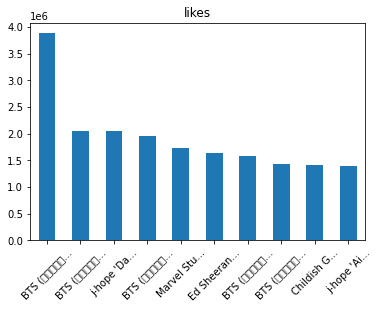

["BTS (방탄소년단) 'FAKE LOVE' Official MV",
 "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV",
 "j-hope 'Daydream (백일몽)' MV",
 "BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer",
 "Marvel Studios' Avengers: Infinity War Official Trailer",
 'Ed Sheeran - Perfect (Official Music Video)',
 "BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF 起 Wonder'",
 "BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ver.)",
 'Childish Gambino - This Is America (Official Video)',
 "j-hope 'Airplane' MV"]

In [173]:
most(my_df,'likes')

## Dislikes

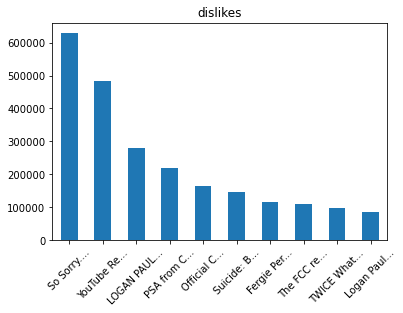

['So Sorry.',
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'LOGAN PAUL IS BACK!',
 'PSA from Chairman of the FCC Ajit Pai',
 'Official Call of Duty®: Black Ops 4 —\xa0Multiplayer Reveal Trailer',
 'Suicide: Be Here Tomorrow.',
 'Fergie Performs The U.S. National Anthem / 2018 NBA All-Star Game',
 'The FCC repeals its net neutrality rules',
 'TWICE What is Love? M/V',
 'Logan Paul - SANTA DISS TRACK (Official Music Video)']

In [169]:
most(my_df, 'dislikes')

## Views

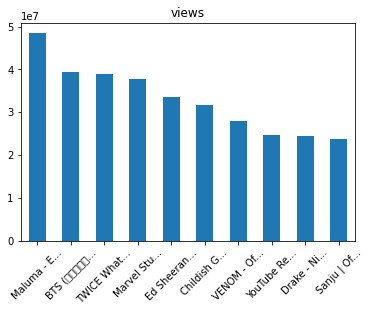

['Maluma - El Préstamo (Official Video)',
 "BTS (방탄소년단) 'FAKE LOVE' Official MV",
 'TWICE What is Love? M/V',
 "Marvel Studios' Avengers: Infinity War Official Trailer",
 'Ed Sheeran - Perfect (Official Music Video)',
 'Childish Gambino - This Is America (Official Video)',
 'VENOM - Official Trailer (HD)',
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'Drake - Nice For What',
 'Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June']

In [170]:
most(my_df,'views')

## Comment count

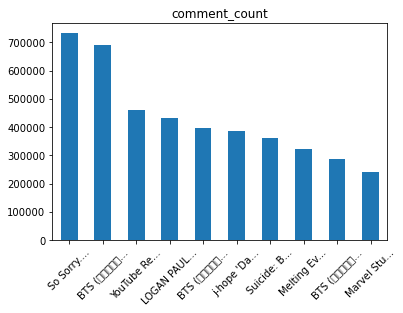

['So Sorry.',
 "BTS (방탄소년단) 'FAKE LOVE' Official MV",
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'LOGAN PAUL IS BACK!',
 "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV",
 "j-hope 'Daydream (백일몽)' MV",
 'Suicide: Be Here Tomorrow.',
 'Melting Every Lipstick From Sephora Together',
 "BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer",
 "Marvel Studios' Avengers: Infinity War Official Trailer"]

In [171]:
most(my_df,'comment_count')